In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv(r"C:\Users\oscar\Downloads\bankdata.csv", sep=';', quotechar='"')

In [3]:
# mapping for cloumn y
df['y'] = df['y'].map({'yes': 1, 'no': 0})

Bar Chart


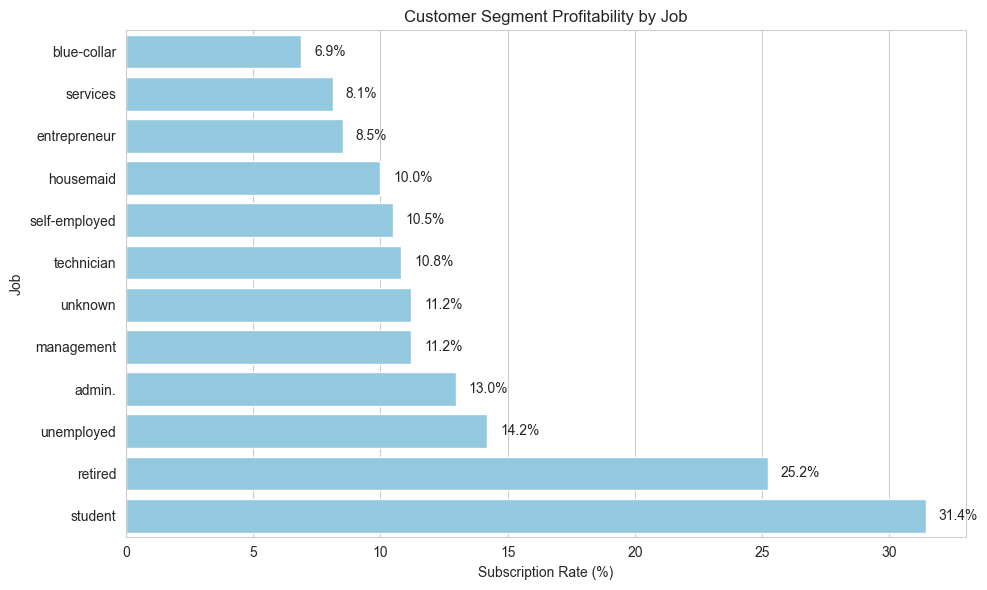

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean subscription rate by job
profit_by_job = df.groupby('job')['y'].mean().sort_values() * 100

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Create the horizontal barplot
ax = sns.barplot(x=profit_by_job.values, y=profit_by_job.index, color='skyblue')

# Add data labels to each bar
for i, value in enumerate(profit_by_job.values):
    plt.text(value + 0.5, i, f'{value:.1f}%', va='center')

# Add titles and labels
plt.title('Customer Segment Profitability by Job')
plt.xlabel('Subscription Rate (%)')
plt.ylabel('Job')

# Adjust layout and show/save plot
plt.tight_layout()
plt.savefig('profitability_by_job.png')
plt.show()

Countplot

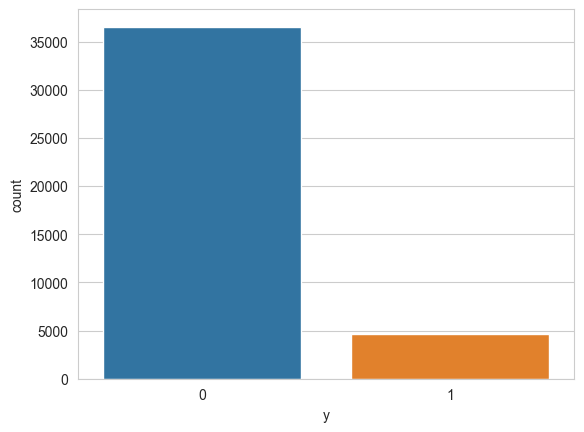

In [8]:
# Display the distribution of 'Survived'
sns.countplot(x='y', data=df)
plt.show()

Piechart

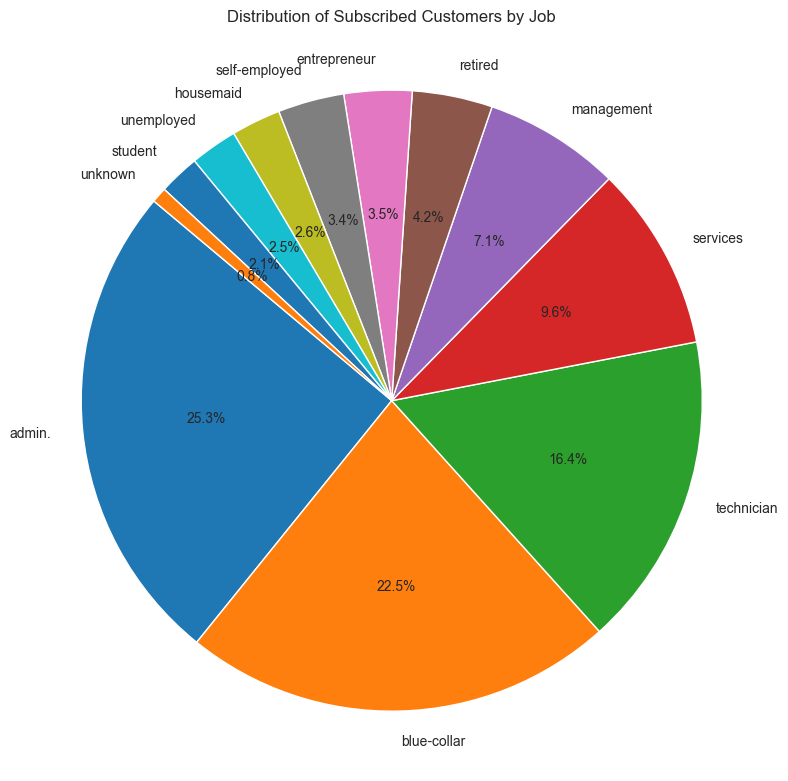

In [7]:
# Count how many people subscribed (y='yes') by job
job_count = df['job'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(job_count, labels=job_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Subscribed Customers by Job')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<Axes: xlabel='job'>

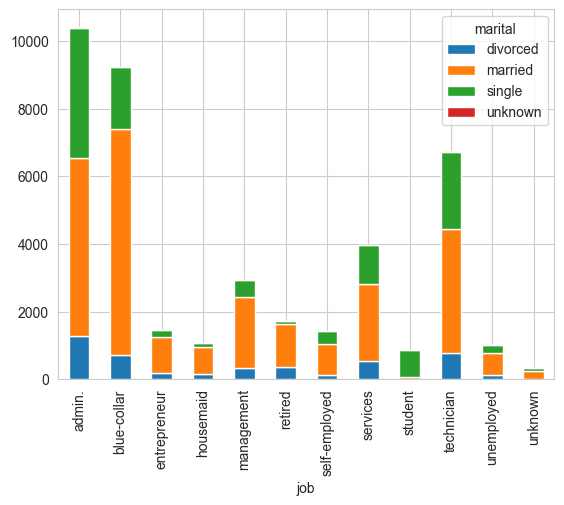

In [ ]:
df.groupby(['job','marital'])['y'].count().unstack().plot(kind='bar', stacked=True)


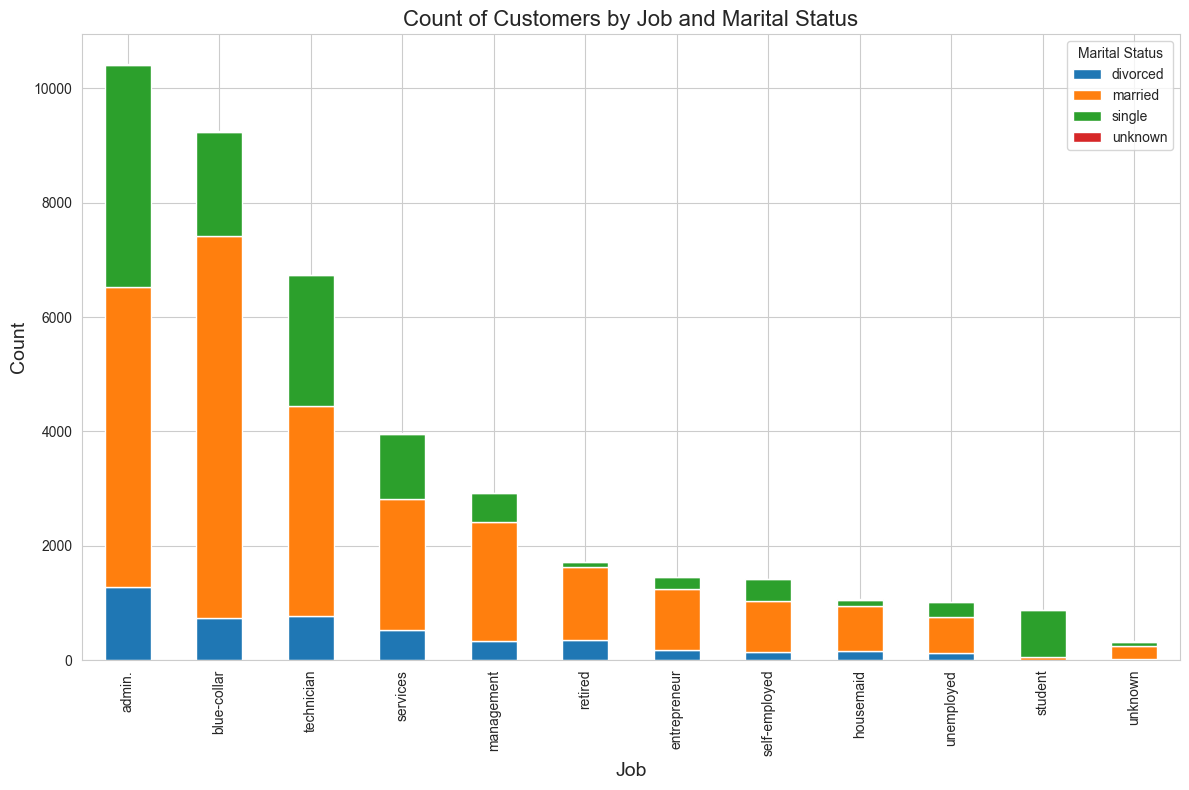

In [11]:
import matplotlib.pyplot as plt

# Group and sort data by the total count of each job
sorted_data = df.groupby(['job', 'marital'])['y'].count().unstack()
sorted_data['Total'] = sorted_data.sum(axis=1)  # Add a total column for sorting
sorted_data = sorted_data.sort_values(by='Total', ascending=False).drop(columns='Total')  # Sort and drop the total column

# Plot the sorted data
sorted_data.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add titles and labels
plt.title('Count of Customers by Job and Marital Status', fontsize=16)
plt.xlabel('Job', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Marital Status', fontsize=10)
plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
profit_by_job = df.groupby('job')['y'].mean() * 100  
profit_by_job.sort_values().plot(kind='barh', color='skyblue')
plt.title('Customer Segment Profitability by Job')
plt.xlabel('Subscription Rate (%)')
plt.ylabel('Job')
plt.tight_layout()
plt.savefig('profitability_by_job.png')
plt.show()